 Supports Ergast API to retrieve historical and current F1 related data <br>
 Works well with Pandas and Matplotlib

 Features: Car data <br>
 Driver info <br>
 Lap count <br>
 race control messages <br>
 session info <br>
 timing <br>
 track status <br>
 weather data <br>

In [1]:
! pip install fastf1

In [2]:
import pandas as pd
import fastf1
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
fastf1.Cache.enable_cache('/content/sample_data/f1 data') # for faster retrieval from API

In [9]:
race_2024 = fastf1.get_session(2024, 'Chinese', 'R') # 'R means Race'
race_2024.load()

core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

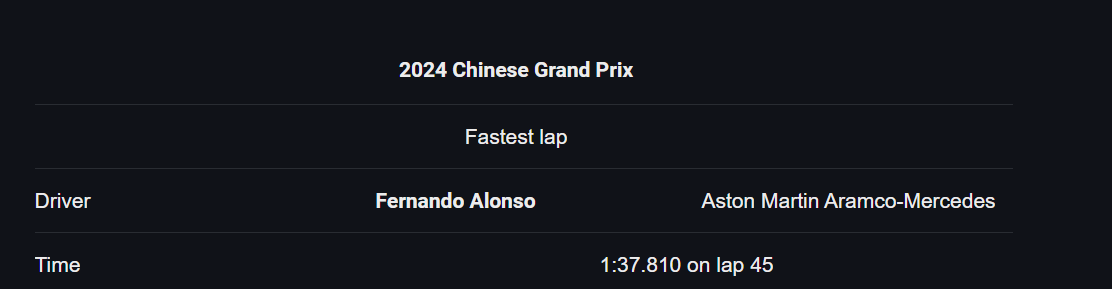

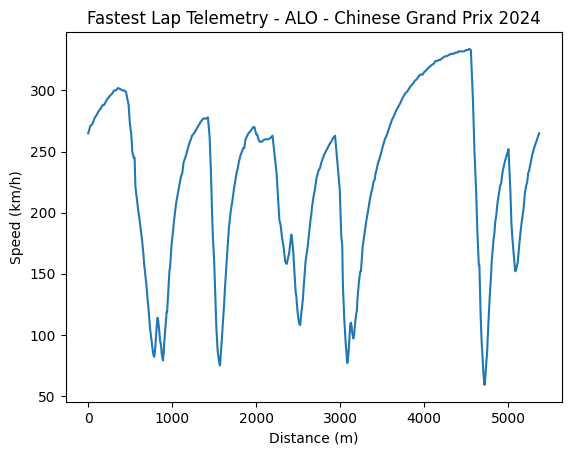

   DriverNumber BroadcastName Abbreviation         DriverId         TeamName  \
1             1  M VERSTAPPEN          VER   max_verstappen  Red Bull Racing   
4             4      L NORRIS          NOR           norris          McLaren   
11           11       S PEREZ          PER            perez  Red Bull Racing   
16           16     C LECLERC          LEC          leclerc          Ferrari   
55           55       C SAINZ          SAI            sainz          Ferrari   
63           63     G RUSSELL          RUS          russell         Mercedes   
14           14      F ALONSO          ALO           alonso     Aston Martin   
81           81     O PIASTRI          PIA          piastri          McLaren   
44           44    L HAMILTON          HAM         hamilton         Mercedes   
27           27  N HULKENBERG          HUL       hulkenberg     Haas F1 Team   
31           31        E OCON          OCO             ocon           Alpine   
23           23       A ALBON          A

In [11]:
# To Get the fastest lap
fastest_lap = session_2024.laps.pick_fastest()

# To Get telemetry data for the fastest lap
telemetry = fastest_lap.get_telemetry()

plt.plot(telemetry['Distance'], telemetry['Speed'])
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title(f"Fastest Lap Telemetry - {fastest_lap['Driver']} - {session_2024.event['EventName']} {session_2024.event.year}")
plt.show()

# Print session results
print(session_2024.results)

Approach:
Considering a combination of each drivers historical lap performance on the track and their qualifying performances.

Scope: Can include more features and tune the model based on the results from todays race.

In [ ]:
'''
Qualifying Performance:
Qualifying position (grid position).
Gap to pole position in qualifying.
Average qualifying lap time.
'''
'+'
'''
Race Performance:
Average race lap time.
Best lap time during the race.
Number of laps led.
Number of overtakes.
'''



In [4]:
# Load 2024 Chinese GP Qualifying Session
qualifying_2024 = fastf1.get_session(2024, 'Chinese', 'Q')  # 'Q' for Qualifying
qualifying_2024.load()
qualifying_results_2024 = qualifying_2024.results

# Calculate Gap to Pole Position
qualifying_results_2024['GapToPole'] = qualifying_results_2024['Q1'] - qualifying_results_2024['Q1'].min()

# Load 2024 Chinese GP Race Session
race_2024 = fastf1.get_session(2024, 'Chinese', 'R')  # 'R' for Race
race_2024.load()
laps_2024 = race_2024.laps

# Prepare Race Performance Data
race_results_2024 = race_2024.results
race_results_2024['AverageLapTime'] = laps_2024.groupby('Driver')['LapTime'].mean()

# Prepare Tire Strategy Data
#tire_data_2024 = laps_2024[['Driver', 'LapNumber', 'Compound', 'TyreLife']]

# Prepare Weather Data
#weather_data_2024 = race_2024.weather_data

# Combine Features into a Single DataFrame for 2024
features_2024 = pd.merge(qualifying_results_2024, race_results_2024, on='FullName')
#features_2024 = pd.merge(features_2024, tire_data_2024, on='Driver')
#features_2024 = pd.merge(features_2024, weather_data_2024, on='Driver')

core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

In [10]:
#qualifying_results_2024.columns # M Verstappen -> BroadcastName ; FullName: Max Verstappen
#race_results_2024.columns # FullName - > Max Verstappen
features_2024.columns

Index(['DriverNumber_x', 'BroadcastName_x', 'Abbreviation_x', 'DriverId_x',
       'TeamName_x', 'TeamColor_x', 'TeamId_x', 'FirstName_x', 'LastName_x',
       'FullName', 'HeadshotUrl_x', 'CountryCode_x', 'Position_x',
       'ClassifiedPosition_x', 'GridPosition_x', 'Q1_x', 'Q2_x', 'Q3_x',
       'Time_x', 'Status_x', 'Points_x', 'GapToPole', 'DriverNumber_y',
       'BroadcastName_y', 'Abbreviation_y', 'DriverId_y', 'TeamName_y',
       'TeamColor_y', 'TeamId_y', 'FirstName_y', 'LastName_y', 'HeadshotUrl_y',
       'CountryCode_y', 'Position_y', 'ClassifiedPosition_y', 'GridPosition_y',
       'Q1_y', 'Q2_y', 'Q3_y', 'Time_y', 'Status_y', 'Points_y',
       'AverageLapTime'],
      dtype='object')

In [9]:
X_2024 = features_2024[['Grid', 'GapToPole', 'Q1_x']]  # Select numerical features
X_2024['GapToPole'] = X_2024['GapToPole'].dt.total_seconds()
X_2024['Q1_x'] = X_2024['Q1_x'].dt.total_seconds()
y_2024 = features_2024['Position_y']  # Target (race finishing position)
y_2024 = y_2024 - 1
# Train the XGBoost Model on 2024 Data
model = xgb.XGBClassifier()
model.fit(X_2024, y_2024)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:DriverNumber_x: object, BroadcastName_x: object, Abbreviation_x: object, DriverId_x: object, TeamName_x: object, TeamColor_x: object, TeamId_x: object, FirstName_x: object, LastName_x: object, FullName: object, HeadshotUrl_x: object, CountryCode_x: object, ClassifiedPosition_x: object, Q1_x: timedelta64[ns], Q2_x: timedelta64[ns], Q3_x: timedelta64[ns], Time_x: timedelta64[ns], Status_x: object, GapToPole: timedelta64[ns], DriverNumber_y: object, BroadcastName_y: object, Abbreviation_y: object, DriverId_y: object, TeamName_y: object, TeamColor_y: object, TeamId_y: object, FirstName_y: object, LastName_y: object, HeadshotUrl_y: object, CountryCode_y: object, ClassifiedPosition_y: object, Q1_y: timedelta64[ns], Q2_y: timedelta64[ns], Q3_y: timedelta64[ns], Time_y: timedelta64[ns], Status_y: object, AverageLapTime: timedelta64[ns]

In [11]:
# Load 2025 Chinese GP Qualifying Session (for prediction)
qualifying_2025 = fastf1.get_session(2025, 'Chinese', 'Q')  # 'Q' for Qualifying
qualifying_2025.load()
qualifying_results_2025 = qualifying_2025.results

# Calculate Gap to Pole Position for 2025
# qualifying_results_2025['GapToPole'] = qualifying_results_2025['Q1'] - qualifying_results_2025['Q1'].min()

# # Prepare 2025 Data for Prediction
# # Assuming you have other 2025 data in a similar format, otherwise use 2024 data as proxy
# features_2025 = qualifying_results_2025

# # Predict the 2025 Race Outcomes
# predictions_2025 = model.predict(features_2025)

# # Create a DataFrame for 2025 Predictions
# predictions_df = pd.DataFrame({
#     'Driver': features_2025['Driver'],
#     'PredictedPosition': predictions_2025
# })

core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

In [19]:
qualifying_results_2025['Position']

,Position
81,1.0
63,2.0
4,3.0
1,4.0
44,5.0
16,6.0
6,7.0
12,8.0
22,9.0
23,10.0


# Logic is to use:  average race lap time was 5% slower than the qualifying lap time, you can apply the same percentage to the 2025 qualifying lap times to estimate the 2025 average race lap time.

In [ ]:
## final approach, from 2024 qualifying i want to consider the features Q1,Q2,Q3. so if there is missing values (NaT) handle it.

In [24]:
# Load 2024 Qualifying and Race Data
qualifying_2024 = fastf1.get_session(2024, 'Chinese', 'Q')
qualifying_2024.load()
race_2024 = fastf1.get_session(2024, 'Chinese', 'R')
race_2024.load()

# Prepare 2024 Features
qualifying_results_2024 = qualifying_2024.results
race_results_2024 = race_2024.results

# Calculate Gap to Pole Position for 2024 ; POLE is set in Qualifying 3
qualifying_results_2024['Q3_seconds'] = qualifying_results_2024['Q3'].dt.total_seconds()
pole_time = qualifying_results_2024['Q3_seconds'].min()
qualifying_results_2024['GapToPole'] = qualifying_results_2024['Q3_seconds'] - pole_time


# Prepare Team-Level Data for 2024
team_performance_2024 = race_results_2024.groupby('TeamName')['Position'].mean().reset_index()
team_performance_2024.rename(columns={'Position': 'TeamAveragePosition'}, inplace=True)

core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

In [40]:
# Load 2025 Qualifying Data
qualifying_2025 = fastf1.get_session(2025, 'Chinese', 'Q')
qualifying_2025.load()
qualifying_results_2025 = qualifying_2025.results

# Calculate Gap to Pole Position for 2025
qualifying_results_2025['Q3_seconds'] = qualifying_results_2025['Q3'].dt.total_seconds()
pole_time = qualifying_results_2025['Q3_seconds'].min()
qualifying_results_2025['GapToPole'] = qualifying_results_2024['Q3_seconds'] - pole_time

core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

In [26]:
#qualifying_results_2025.columns # TeamName\
team_performance_2024.columns

Index(['TeamName', 'TeamAveragePosition'], dtype='object')

In [30]:
features_2024 = pd.merge(qualifying_results_2024, team_performance_2024, on='TeamName', how='left')

In [33]:
features_2024['TeamAveragePosition'].fillna(features_2024['TeamAveragePosition'].mean(), inplace=True)

# Add Qualifying Position as a Feature
features_2024['QualifyingPosition'] = features_2024['Position']

<ipython-input-33-22b0211e1728>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_2024['TeamAveragePosition'].fillna(features_2024['TeamAveragePosition'].mean(), inplace=True)


In [41]:
# Merge 2025 Qualifying Data with Team-Level Data
features_2025 = pd.merge(qualifying_results_2025, team_performance_2024, on='TeamName', how='left')

# For New Drivers Without Team Data, Use Historical Averages
features_2025['TeamAveragePosition'].fillna(features_2025['TeamAveragePosition'].mean(), inplace=True)

# Add Qualifying Position as a Feature
features_2025['QualifyingPosition'] = features_2025['Position']

<ipython-input-41-796354bec2a6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_2025['TeamAveragePosition'].fillna(features_2025['TeamAveragePosition'].mean(), inplace=True)


In [42]:
features_2025.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points',
       'Q3_seconds', 'GapToPole', 'TeamAveragePosition', 'QualifyingPosition'],
      dtype='object')

In [38]:
# Prepare 2024 Features and Target
X_2024 = features_2024[['GapToPole', 'TeamAveragePosition', 'QualifyingPosition']]
y_2024 = features_2024['Position']  # Target
y_2024 = y_2024 - 1
# Train the XGBoost Model
model = xgb.XGBClassifier()
model.fit(X_2024, y_2024)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [47]:
X_2025

,GapToPole,TeamAveragePosition,QualifyingPosition
0,3.632,5.000000,1.0
1,3.792,7.500000,2.0
2,3.524,5.000000,3.0
3,3.019,2.000000,4.0
4,NaN,4.500000,5.0
5,3.648,4.500000,6.0
6,NaN,9.611111,7.0
7,NaN,7.500000,8.0
8,NaN,9.611111,9.0
9,NaN,14.500000,10.0


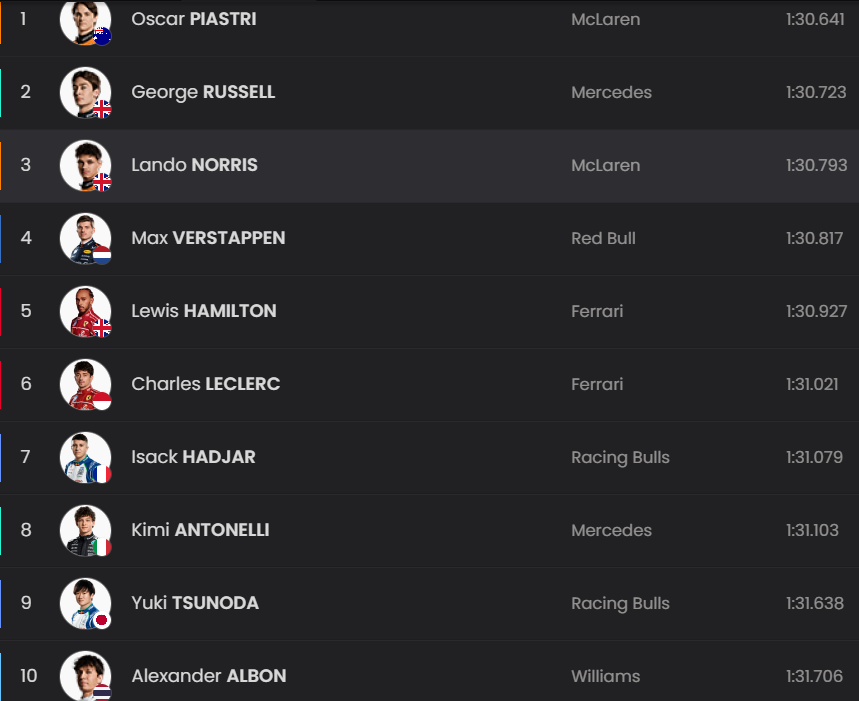

In [15]:
X_2024

,GapToPole,TeamAveragePosition
0,0.000,2.0
1,0.322,2.0
2,0.488,11.0
3,0.505,5.0
4,0.613,5.0
5,0.629,4.5
6,0.637,4.5
7,0.773,7.5
8,0.944,13.0
9,1.005,17.0


In [12]:
qualifying_results_2024[['FullName','Position']]

,FullName,Position
1,Max Verstappen,1.0
11,Sergio Perez,2.0
14,Fernando Alonso,3.0
4,Lando Norris,4.0
81,Oscar Piastri,5.0
16,Charles Leclerc,6.0
55,Carlos Sainz,7.0
63,George Russell,8.0
27,Nico Hulkenberg,9.0
77,Valtteri Bottas,10.0


In [13]:
qualifying_results_2025[['FullName','Position']]

,FullName,Position
81,Oscar Piastri,1.0
63,George Russell,2.0
4,Lando Norris,3.0
1,Max Verstappen,4.0
44,Lewis Hamilton,5.0
16,Charles Leclerc,6.0
6,Isack Hadjar,7.0
12,Andrea Kimi Antonelli,8.0
22,Yuki Tsunoda,9.0
23,Alexander Albon,10.0


In [18]:
import pandas as pd
import fastf1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Enable cache for faster data retrieval
fastf1.Cache.enable_cache('/content/sample_data/f1 data')

# Load 2024 Race Data
session_2024 = fastf1.get_session(2024, 3, "R")
session_2024.load()

# Extract lap times
laps_2024 = session_2024.laps[["Driver", "LapTime"]].copy()
laps_2024.dropna(subset=["LapTime"], inplace=True)
laps_2024["LapTime (s)"] = laps_2024["LapTime"].dt.total_seconds()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
DEBUG:fastf1.ergast:Failed to parse timestamp '-1:57:37.891' in Ergastresponse.
req            INFO 	No cached data found for session_status_

In [20]:
qualifying_results_2025[['FullName','Q1','Q2','Q3']]

,FullName,Q1,Q2,Q3
81,Oscar Piastri,0 days 00:01:31.591000,0 days 00:01:31.200000,0 days 00:01:30.641000
63,George Russell,0 days 00:01:31.295000,0 days 00:01:31.307000,0 days 00:01:30.723000
4,Lando Norris,0 days 00:01:30.983000,0 days 00:01:30.787000,0 days 00:01:30.793000
1,Max Verstappen,0 days 00:01:31.424000,0 days 00:01:31.142000,0 days 00:01:30.817000
44,Lewis Hamilton,0 days 00:01:31.690000,0 days 00:01:31.501000,0 days 00:01:30.927000
16,Charles Leclerc,0 days 00:01:31.579000,0 days 00:01:31.450000,0 days 00:01:31.021000
6,Isack Hadjar,0 days 00:01:31.162000,0 days 00:01:31.253000,0 days 00:01:31.079000
12,Andrea Kimi Antonelli,0 days 00:01:31.676000,0 days 00:01:31.590000,0 days 00:01:31.103000
22,Yuki Tsunoda,0 days 00:01:31.238000,0 days 00:01:31.260000,0 days 00:01:31.638000
23,Alexander Albon,0 days 00:01:31.503000,0 days 00:01:31.595000,0 days 00:01:31.706000


In [ ]:
# q3 = pd.to_timedelta(qualifying_results_2025['Q3'])

# # Convert to seconds
# qualifying_time_seconds = [td.total_seconds() for td in q3]

# # Handle missing values (replace NaN with 0)
# qualifying_time_seconds = [x if pd.notna(x) else 0 for x in qualifying_time_seconds]
# print(qualifying_time_seconds)

In [1]:
import pandas as pd
import fastf1
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Enable cache for faster data retrieval
fastf1.Cache.enable_cache('/content/sample_data/f1 data')

# Load 2024 Race Data
session_2024 = fastf1.get_session(2024, 3, "R")
session_2024.load()

# Extract lap times
laps_2024 = session_2024.laps[["Driver", "LapTime"]].copy()
laps_2024.dropna(subset=["LapTime"], inplace=True)
laps_2024["LapTime (s)"] = laps_2024["LapTime"].dt.total_seconds()

# Filter laps_2024 to include only the specified drivers
drivers_to_keep = ["NOR", "PIA", "VER", "RUS", "TSU", "ALB", "LEC", "HAM", "GAS", "SAI"]
laps_2024 = laps_2024[laps_2024["Driver"].isin(drivers_to_keep)]

# Calculate mean lap time per driver
mean_lap_times = laps_2024.groupby("Driver")["LapTime (s)"].mean().reset_index()
mean_lap_times.rename(columns={"LapTime (s)": "MeanLapTime"}, inplace=True)

# Prepare 2025 Qualifying Data
qualifying_2025 = pd.DataFrame({
    "Driver": [
        "Lando Norris", "Oscar Piastri", "Max Verstappen",
        "George Russell", "Yuki Tsunoda", "Alexander Albon",
        "Charles Leclerc", "Lewis Hamilton", "Pierre Gasly", "Carlos Sainz"
    ],
    "QualifyingTime (s)": [90.793, 90.641, 90.817, 90.723,
                           91.638, 91.706, 91.021, 90.927,
                           110.100, 105.140]
})
driver_mapping = {
    "Lando Norris": "NOR", "Oscar Piastri": "PIA", "Max Verstappen": "VER",
    "George Russell": "RUS", "Yuki Tsunoda": "TSU", "Alexander Albon": "ALB",
    "Charles Leclerc": "LEC", "Lewis Hamilton": "HAM", "Pierre Gasly": "GAS",
    "Carlos Sainz": "SAI", "Lance Stroll": "STR", "Fernando Alonso": "ALO"
}

qualifying_2025["DriverCode"] = qualifying_2025["Driver"].map(driver_mapping)

# Merge mean_lap_times with qualifying_2025
qualifying_2025 = qualifying_2025.merge(mean_lap_times, left_on="DriverCode", right_on="Driver", how="left")
qualifying_2025.drop(columns=["Driver_y"], inplace=True)  # Remove redundant 'Driver' column

# Calculate Gap to Pole Position
pole_time_2025 = qualifying_2025["QualifyingTime (s)"].min()
qualifying_2025["GapToPole"] = qualifying_2025["QualifyingTime (s)"] - pole_time_2025

# Add Team Performance Data (Example: Team's Average Finishing Position)
team_performance = {
    "NOR": 1.0, "PIA": 1.0, "VER": 2.0, "RUS": 4.0, "TSU": 6.0,
    "ALB": 7.0, "LEC": 3.0, "HAM": 3.0, "GAS": 8.0, "SAI": 7.0
}
qualifying_2025["TeamPerformance"] = qualifying_2025["DriverCode"].map(team_performance)

# Add Historical Performance Data (Example: Driver's Average Finishing Position)
historical_performance = {
    "NOR": 2.0, "PIA": 8.0, "VER": 1.0, "RUS": 6.0, "TSU": 19.0,
    "ALB": 11.0, "LEC": 4.0, "HAM": 9.0, "GAS": 10.0, "SAI": 5.0
}
qualifying_2025["HistoricalPerformance"] = qualifying_2025["DriverCode"].map(historical_performance)

# Prepare Features and Target
X = qualifying_2025[["QualifyingTime (s)", "GapToPole", "TeamPerformance", "HistoricalPerformance", "MeanLapTime"]]
y = qualifying_2025["MeanLapTime"] # Target variable is now MeanLapTime

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=39)

# Train the Gradient Boosting Model
#model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=39)
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:fastf1.ergast:Failed to parse timestamp '-1:57:37.891' in Ergastresponse.
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timi

In [46]:
predictions

array([83.324974, 83.6556  ], dtype=float32)

In [2]:
# Predict Using 2025 Qualifying Data
#qualifying_2025_scaled = scaler.transform(qualifying_2025[["QualifyingTime (s)", "GapToPole", "TeamPerformance", "HistoricalPerformance", "MeanLapTime"]])
qualifying_2025.rename(columns={"Driver": "Driver_x"}, inplace=True) # Rename the column first
qualifying_2025['Driver'] = qualifying_2025['Driver_x'] # Then, create a new 'Driver' column with the renamed data
predicted_lap_times = model.predict(qualifying_2025[["QualifyingTime (s)", "GapToPole", "TeamPerformance", "HistoricalPerformance", "MeanLapTime"]])

# Add Predicted Lap Times to the DataFrame
qualifying_2025["PredictedRaceTime (s)"] = predicted_lap_times

# Rank Drivers by Predicted Race Time
qualifying_2025 = qualifying_2025.sort_values(by="PredictedRaceTime (s)")
# qualifying_2025['Driver'] = qualifying_2025.rename(columns={"Driver": "Driver_x"}, inplace=True) # This line was causing the issue
# Print Final Predictions
print("\n🏆 Predicted 2025 Chinese GP Winner 🏆\n")
print(qualifying_2025[["Driver"]])


🏆 Predicted 2025 Chinese GP Winner 🏆

            Driver
0     Lando Norris
1    Oscar Piastri
2   Max Verstappen
3   George Russell
4     Yuki Tsunoda
5  Alexander Albon
6  Charles Leclerc
7   Lewis Hamilton
8     Pierre Gasly
9     Carlos Sainz


In [43]:
qualifying_2025

,Driver_x,QualifyingTime (s),DriverCode,MeanLapTime,GapToPole,TeamPerformance,HistoricalPerformance,PredictedRaceTime (s)
9,Carlos Sainz,105.140,SAI,83.221431,14.499,7.0,5.0,83.221460
6,Charles Leclerc,91.021,LEC,83.262224,0.380,3.0,4.0,83.262249
0,Lando Norris,90.793,NOR,83.323224,0.152,1.0,2.0,83.323245
3,George Russell,90.723,RUS,83.655964,0.082,4.0,6.0,83.655979
2,Max Verstappen,90.817,VER,84.890667,0.176,2.0,1.0,84.244744
1,Oscar Piastri,90.641,PIA,83.838155,0.000,1.0,8.0,84.300018
5,Alexander Albon,91.706,ALB,84.769333,1.065,7.0,11.0,84.769318
4,Yuki Tsunoda,91.638,TSU,84.869724,0.997,6.0,19.0,84.869706
7,Lewis Hamilton,90.927,HAM,85.228400,0.286,3.0,9.0,85.228373
8,Pierre Gasly,110.100,GAS,85.312211,19.459,8.0,10.0,85.312181
